# *Lead Scoring Case Study*

## Problem Statement
An Education company sells online courses to industry professionals, and needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Setting working directory
import os
os.chdir("C:\\Users\\deepi\\Desktop\\data science\\Machine Learning\\Logistic linear regression\\Assignment\\Lead+Scoring+Case+Study\\Lead Scoring Assignment")

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [3]:
# Importing the dataset
Lead = pd.read_csv("Leads.csv")

In [4]:
# Head of our dataset
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe.
Lead.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe.
Lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the datatype of each column.
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

>- Most of the columns are object datatype, followed by float and also 2 int datatype columns are present in the dataset.

## Data Cleaning
Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

In [8]:
# Replacing 'Select' with NaN.
Lead.replace("Select", value= np.nan, inplace= True)

In [9]:
# Checking for null values in the dataset.
null = pd.DataFrame(Lead.isnull().sum()/len(Lead)*100).reset_index()
null.columns = ["variable", "null_values(percentage)"]
null

,variable,null_values(percentage)
0,Prospect ID,0.000000
1,Lead Number,0.000000
2,Lead Origin,0.000000
3,Lead Source,0.389610
4,Do Not Email,0.000000
5,Do Not Call,0.000000
6,Converted,0.000000
7,TotalVisits,1.482684
8,Total Time Spent on Website,0.000000
9,Page Views Per Visit,1.482684


In [10]:
# Columns with high null values (more than or equal to 40%)
null[null["null_values(percentage)"] >=40]

,variable,null_values(percentage)
13,How did you hear about X Education,78.463203
25,Lead Quality,51.590909
28,Lead Profile,74.188312
30,Asymmetrique Activity Index,45.649351
31,Asymmetrique Profile Index,45.649351
32,Asymmetrique Activity Score,45.649351
33,Asymmetrique Profile Score,45.649351


In [11]:
# Removing the columns with more than 40% of null values.
Lead.drop(["How did you hear about X Education", "Lead Quality", "Lead Profile", "Asymmetrique Activity Index", 
           "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score",
           "Asymmetrique Profile Score"], 1, inplace= True)

In [12]:
Lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
South Africa               4
Canada                     4
Germany                    4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
China                      2
Ghana                      2
Philippines                2
Bangladesh                 2
Italy                      2
Belgium                    2
Uganda                     2
Tanzania                   1
Vietnam                    1
Liberia                    1
Sri Lanka                  1
Switzerland                1
Kenya                      1
Indonesia     

>- Since Country is a categorical column with 26% null values the best way to deal with it would be to replace the null values with the mode of the column.

In [13]:
# Replacing null values in country column with the mode.
Lead.Country.replace(to_replace= np.nan, value= Lead.Country.mode().values[0], inplace= True)

In [14]:
Lead.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

>- We can see that the 'Specialization' column does not have a level called 'other', therefore the customers who do not belong to any of the above specializations would have left this field blank. So we can replace the null values with 'other'.

In [15]:
# Replacing the null values in Specialization column with 'other' category
Lead.Specialization.replace(to_replace= np.nan, value= "other", inplace= True)

In [16]:
Lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
# Replacing null values in occupation column with the mode ('Unemployed')
Lead["What is your current occupation"].replace(to_replace= np.nan, value= Lead["What is your current occupation"].mode().values[0], inplace= True)

In [18]:
Lead["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
# Replacing null values in "What matters most to you in choosing a course" column with the mode ('Better Career Prospects')
Lead["What matters most to you in choosing a course"].replace(to_replace= np.nan, value= Lead["What matters most to you in choosing a course"].mode().values[0], inplace= True)

In [20]:
Lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [21]:
# Replacing null values in "Tags" column with the mode ('Will revert after reading the email')
Lead["Tags"].replace(to_replace= np.nan, value= Lead["Tags"].mode().values[0], inplace= True)

In [22]:
Lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
# Replacing null values in "City" column with the mode ('Mumbai')
Lead["City"].replace(to_replace= np.nan, value= Lead["City"].mode().values[0], inplace= True)

In [24]:
Lead.isnull().sum()/len(Lead)*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [25]:
# Columns with very less null values.
null[(null["null_values(percentage)"] <=10) & (null["null_values(percentage)"] > 0)]

,variable,null_values(percentage)
3,Lead Source,0.389610
7,TotalVisits,1.482684
9,Page Views Per Visit,1.482684
10,Last Activity,1.114719


In [26]:
# Removing rows with null values.
Lead.dropna(axis=0, inplace= True)

In [27]:
# Checking again for null values.
Lead.isnull().sum()/len(Lead)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [28]:
# Checking data imbalance.
Lead.Converted.mean()                                        

0.3785541106458012

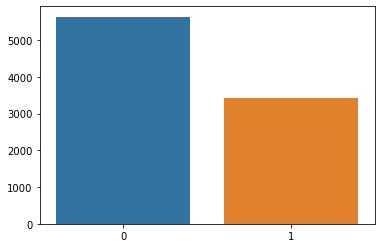

In [29]:
# Visualizing Data Imbalance
sns.barplot(x = Lead.Converted.value_counts().index, y = Lead.Converted.value_counts().values)
plt.show()

>- We can see that the data is fairly balanced, we can proceed with EDA.

## Exploratory Data Analysis

### Univariate Analysis

In [30]:
# Creating a list of the categorical columns.
Lead_cat_col = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [31]:
# Defining a function to visualize categorical columns.
def bar_plot(Attribute,rot = False):
    for Attribute in Lead_cat_col:    

        plt.figure(figsize=[12,6])
        sns.countplot(Attribute, data = Lead, hue="Converted", palette= 'magma')
        plt.xlabel(Attribute)
        plt.ylabel("Count")
        if rot:
            plt.xticks(rotation = 90)    

        plt.show()


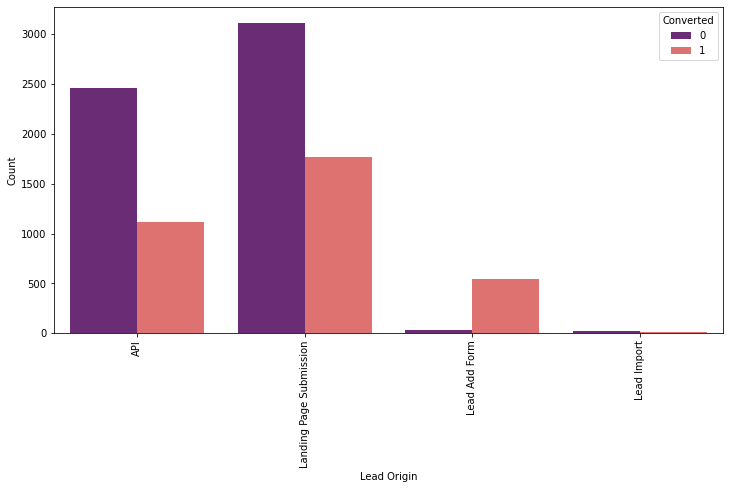

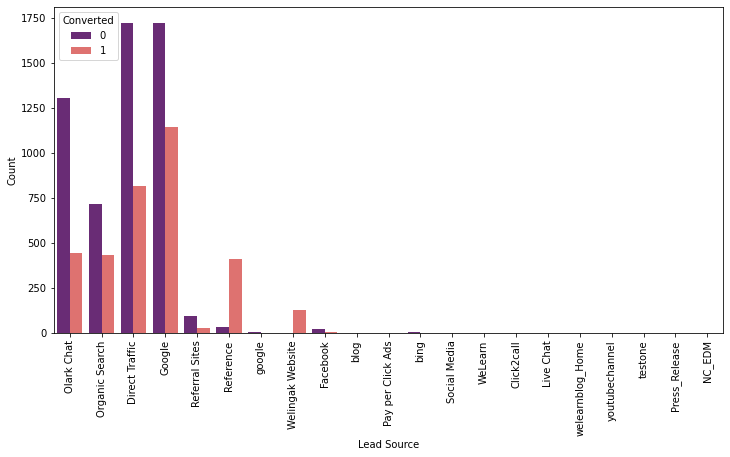

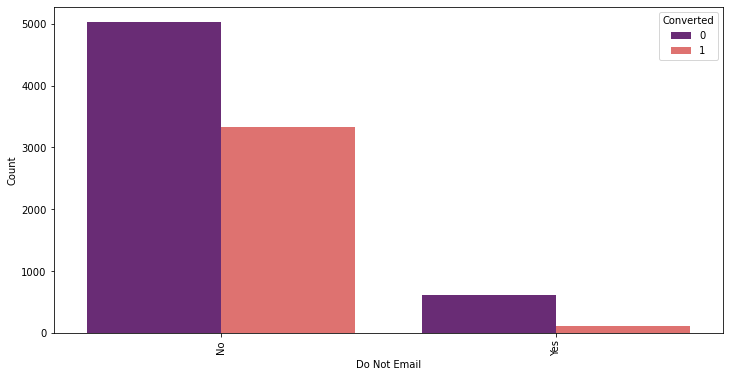

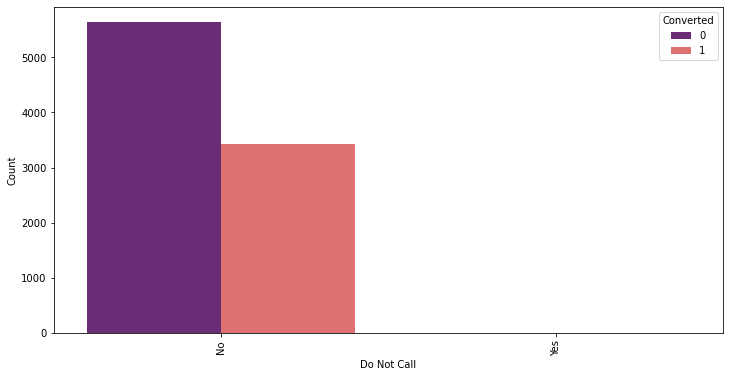

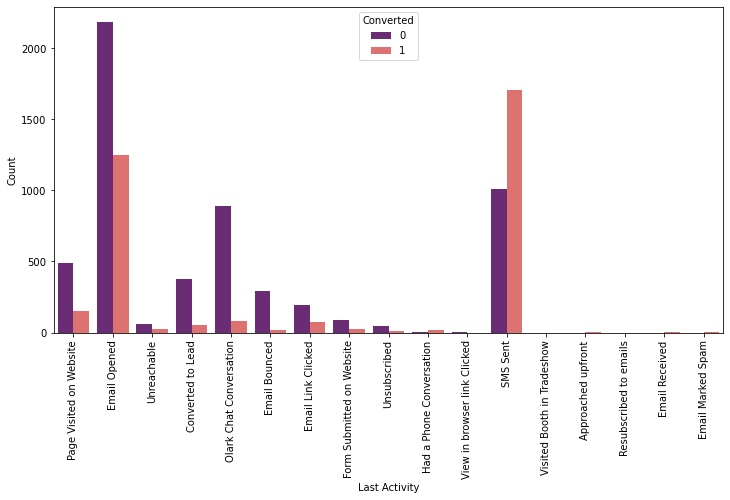

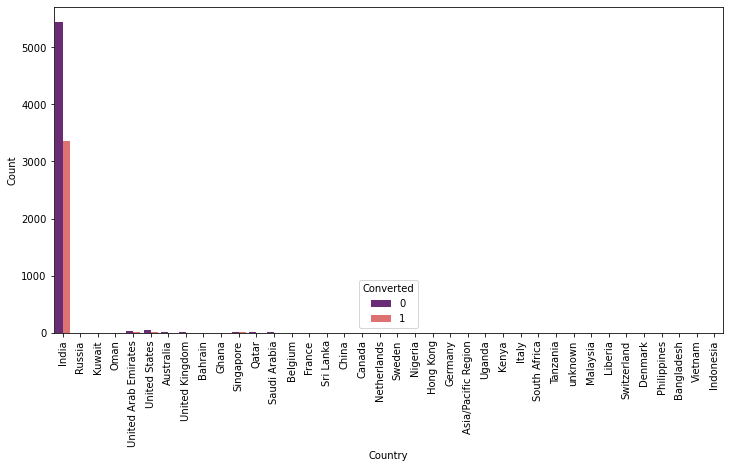

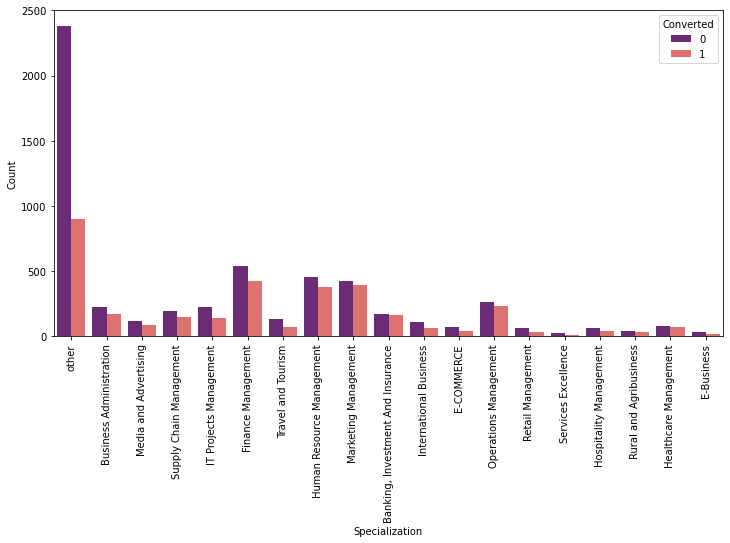

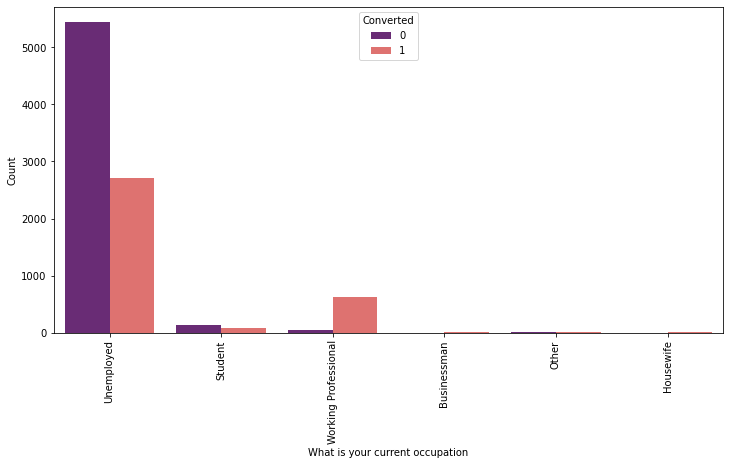

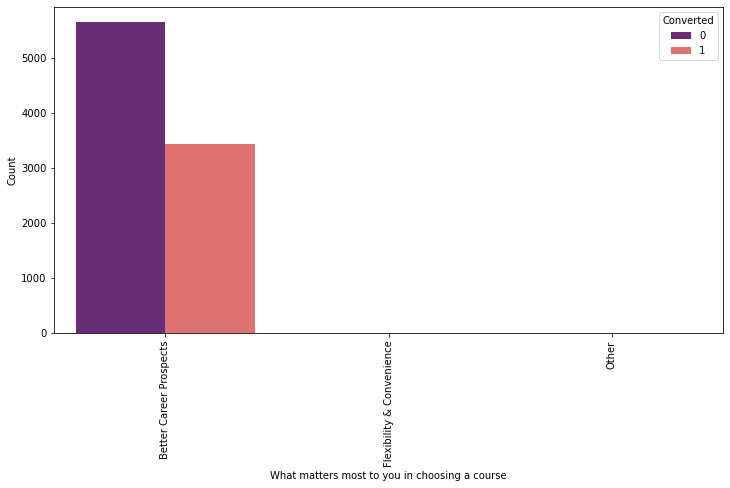

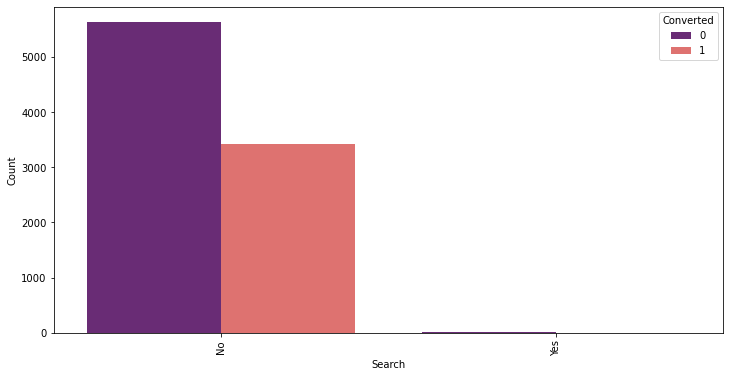

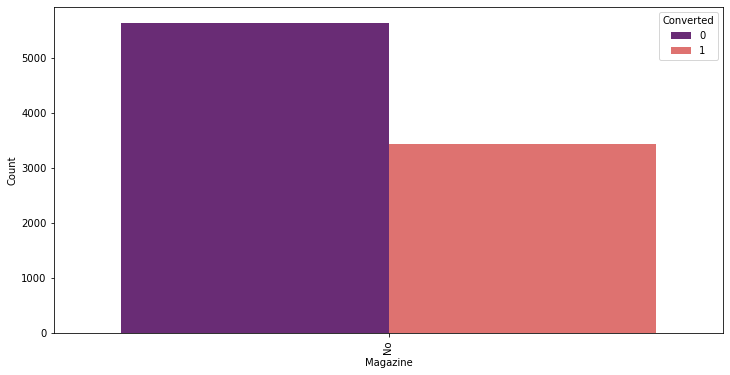

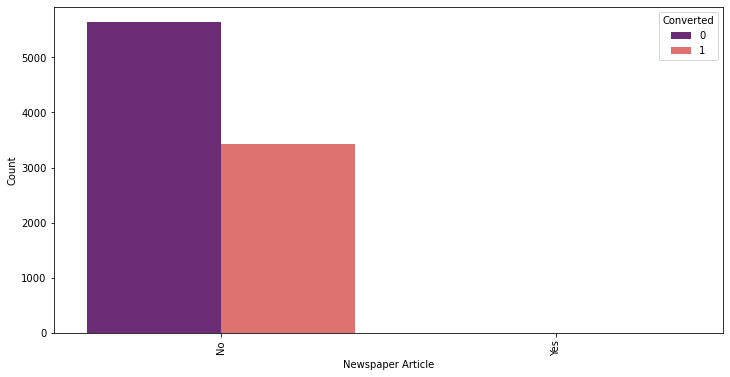

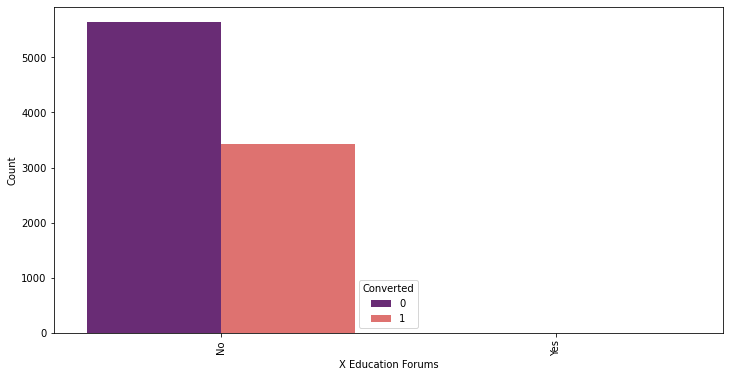

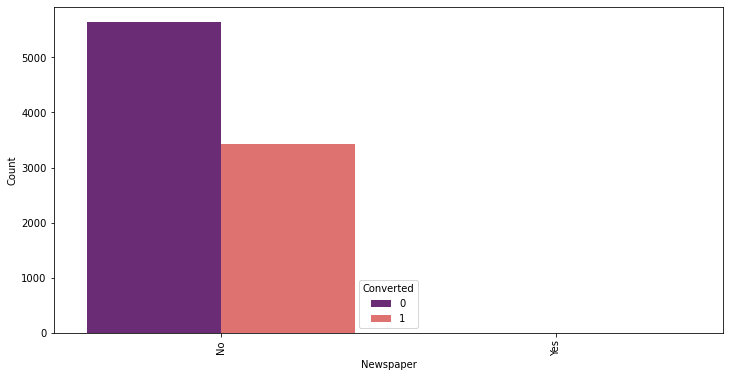

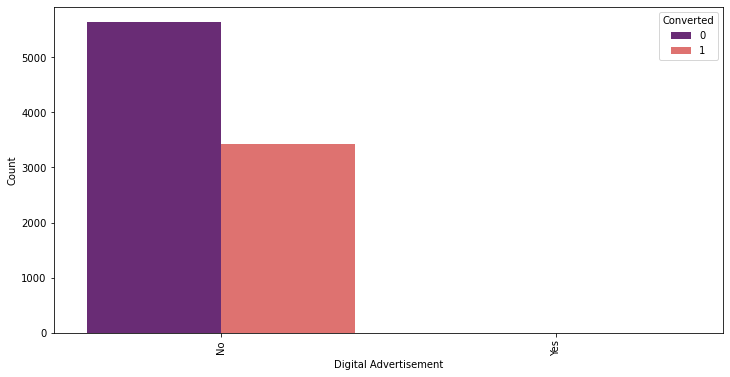

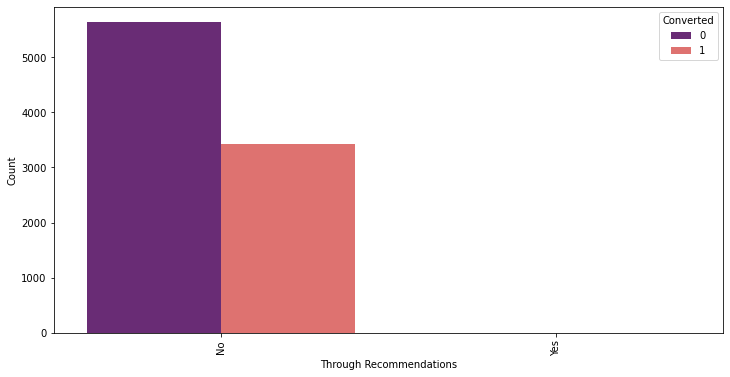

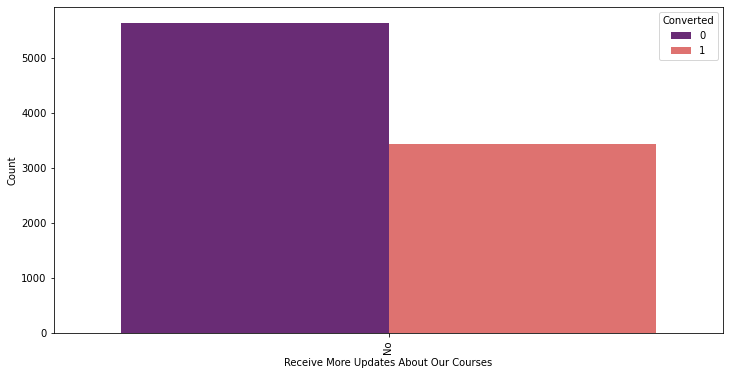

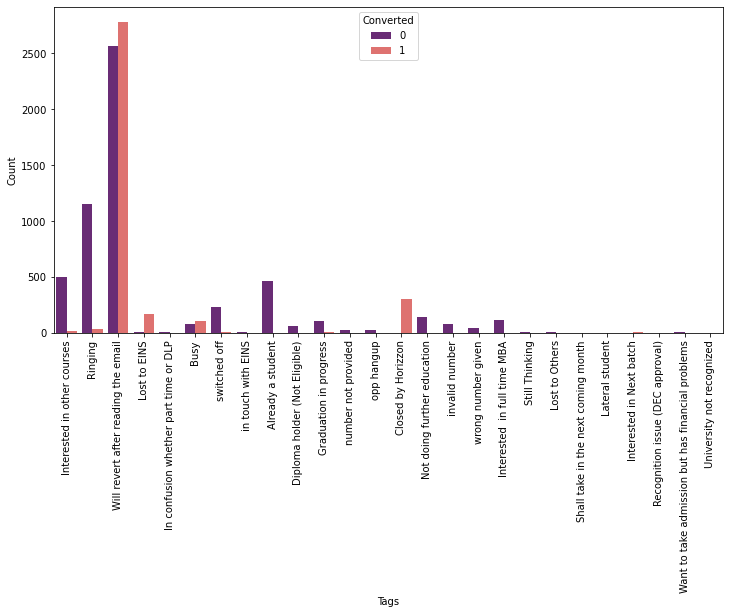

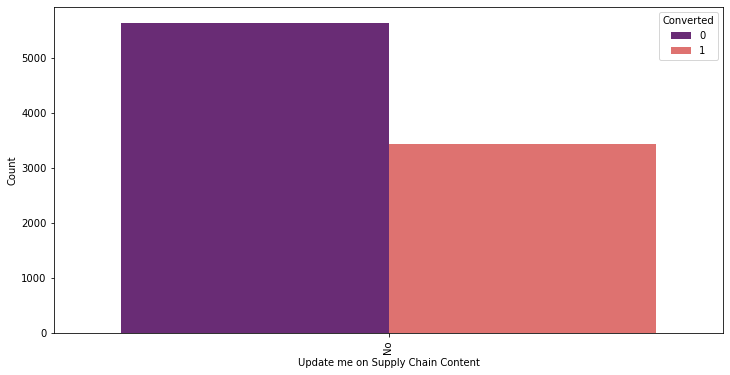

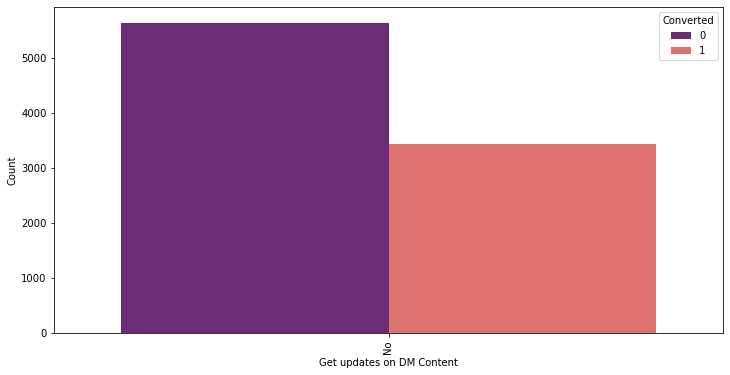

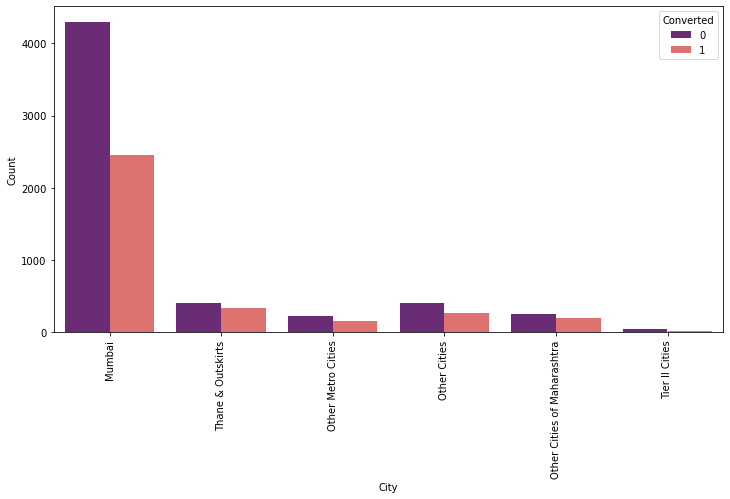

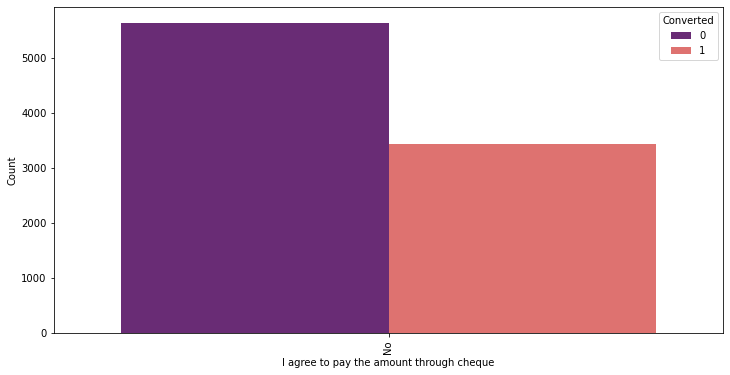

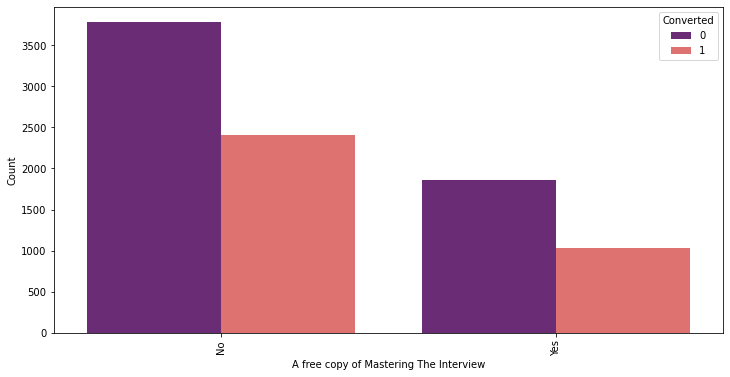

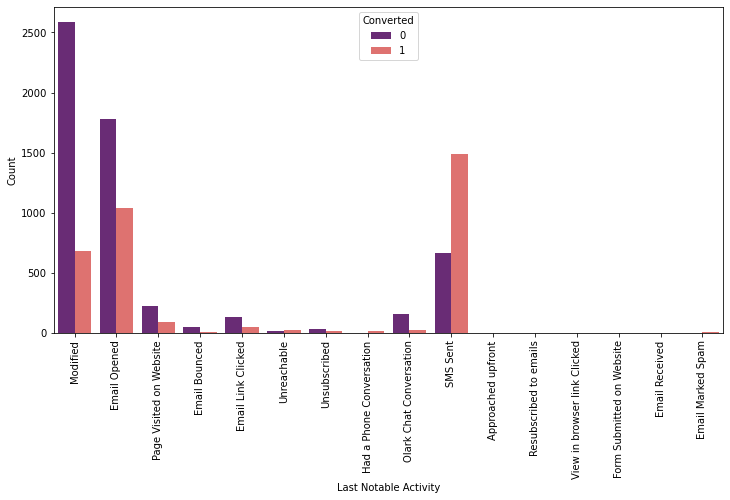

In [32]:
# visualize all the categorical variable
bar_plot(Lead_cat_col, rot = True)

### The following inferences can be made from the above plots:
>- The count of lead originating from 'API' and 'Landing Page Submission' are very significant and have around 30% conversion rate.
>- 'Lead Add Form' has a very high conversion rate(around 90%) but the count of lead is very low.
>- The lead source is mostly from 'Google' followed by 'Direct traffic' but their conversion rate is pretty low.
>-'Reference' and 'welingak website' have a very high conversion rate but the number of leads generated is very low.
>- Most of the leads last activity is 'Email Opened' followed by 'SMS Sent'. The conversion rate is pretty good for SMS sent category.
>- Most of the leads are unemployed and they do not have a good conversion rate.
> Working professionals have a very good conversion rate but the number of leads is pretty low.
>- Leads who are tagged as 'Will revert after rading email' have a good conversion rate and the number of leads are high as well.
>- It is clearly evident that most of the leads are from Mumbai and they have around 30% conversion rate.

>- Also the columns 'Last Notable Activity', 'Tags', 'Specialization', 'Last Activity' and 'Lead Source' have only few levels which have a large number of values and the remaining levels have very minimal number of values and hence we can replace them with a common level named 'Others'.

In [33]:
# Replacing the levels having minimal values with 'Other'.
Lead["Last Notable Activity"].replace(["Unsubscribed", "Unreachable", "Had a Phone Conversation", "Email Marked Spam", 
                                       "View in browser link Clicked", "Email Received", "View in browser link Clicked", 
                                       "Email Received", "Form Submitted on Website", "Approached upfront", 
                                       "Resubscribed to emails"], value= "Other_LNA", inplace= True)
Lead["Tags"].replace(["Busy", "Lost to EINS", "Not doing further education", "Interested  in full time MBA", 
                      "Graduation in progress", "invalid number", "Diploma holder (Not Eligible)", "wrong number given", 
                      "opp hangup", "number not provided", "in touch with EINS", "Lost to Others", "Still Thinking",
                      "Want to take admission but has financial problems", "Interested in Next batch",
                      "In confusion whether part time or DLP", "Lateral student", "University not recognized", 
                      "Shall take in the next coming month", "Recognition issue (DEC approval)"], value="other_Tags",
                     inplace= True)
Lead["Specialization"].replace(["International Business", "Healthcare Management", "Hospitality Management", "E-COMMERCE", 
                                "Retail Management", "Rural and Agribusiness", "E-Business", "Services Excellence"], 
                               value="other_Specialization", inplace= True)
Lead["Last Activity"].replace(["Form Submitted on Website", "Unreachable", "Unsubscribed", "Had a Phone Conversation",
                               "View in browser link Clicked", "Approached upfront", "Email Received", "Email Marked Spam",
                               "Visited Booth in Tradeshow", "Resubscribed to emails"], value= "other_LA", inplace= True)
Lead["Lead Source"]. replace(["Facebook", "bing", "google", "Click2call", "Social Media", "Live Chat", "Press_Release",
                              "testone", "Pay per Click Ads", "blog", "youtubechannel", "welearnblog_Home", "NC_EDM", "WeLearn"],
                             value="other_LS", inplace= True)

In [34]:
# Creating a list of continuous variables.
Lead_conti_col = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

In [35]:
# Defining a function to visualize continuous variables.
def box_plot(Attribute):
    for Attribute in Lead_conti_col:
        plt.figure(figsize=(12,6))
        sns.boxplot(y = Attribute, x = "Converted", orient="v", data = Lead)
        plt.show()

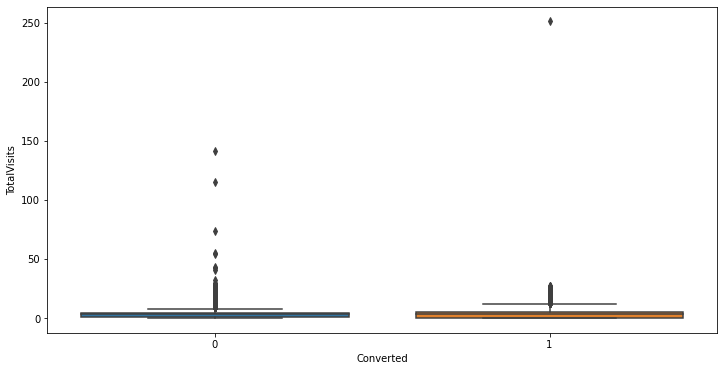

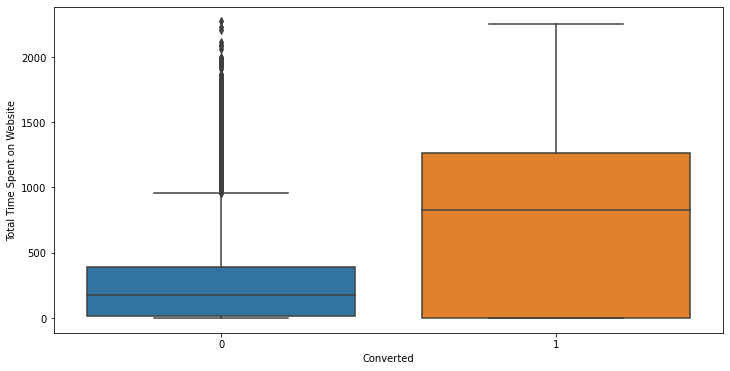

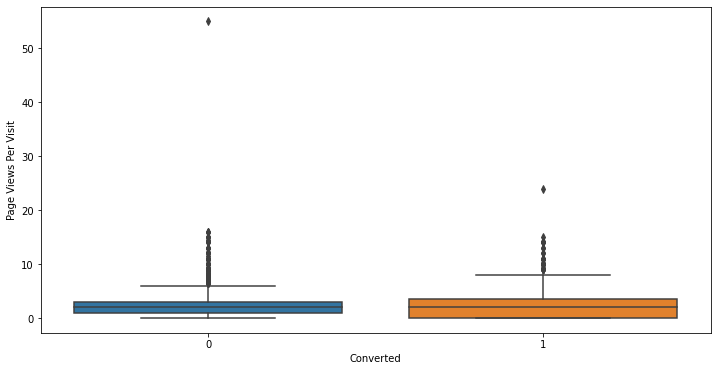

In [36]:
# visualizing continious variable
box_plot(Lead_conti_col)

### From the above boxplots the following inferences can be made:
>- We see the presence of extreme outliers in 'TotalVisits' and 'Page Views Per Visit' columns.
>- Logistic Regression is heavily affected by outliers therefore we can cap the 'TotalVisits' and 'Page Views Per Visit' to their 95th percentile. 

In [37]:
# Outlier Treatment.
for i in Lead_conti_col:
    q = Lead[i].quantile(0.05)
    Lead[i][Lead[i]<q] = q # Capping lower range outliers of continuous variables
    p = Lead[i].quantile(0.95)
    Lead[i][Lead[i]>p] = p # Capping upper range outliers of continuous variables

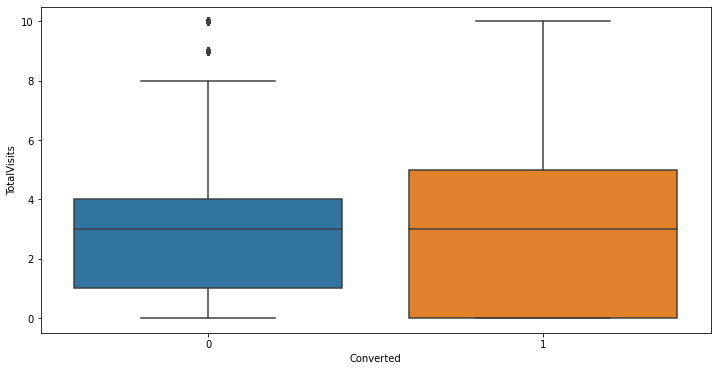

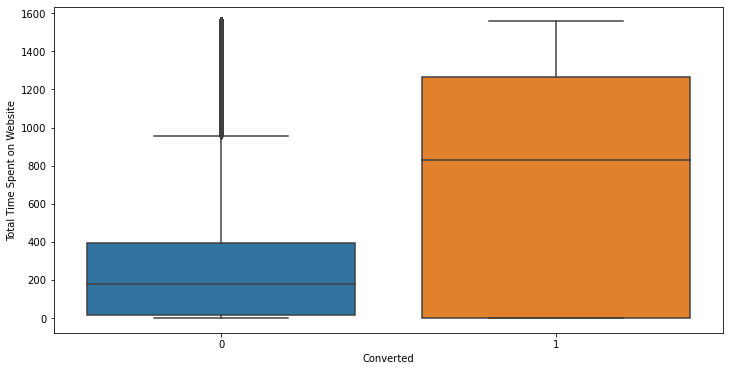

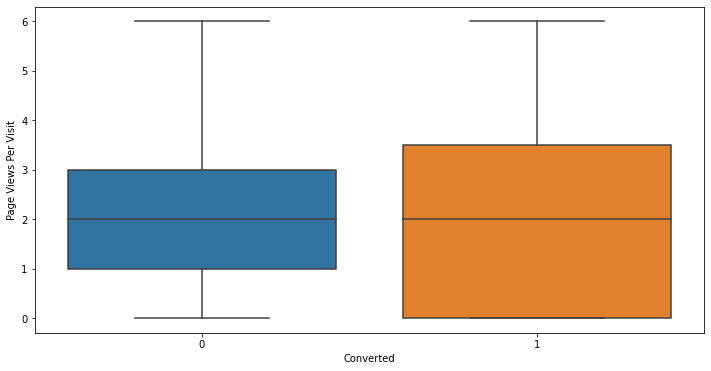

In [38]:
# Visualizing continuous variables after capping the outliers.
box_plot(Lead_conti_col)

### From the above boxplots the following inferences can be made:
>- The median value of total visits is similar for both converted and non converted leads
>- The leads who are converted spent more time on the website as we can see a big increase in the median and IQR for the converted leads.

### Bivariate Analysis

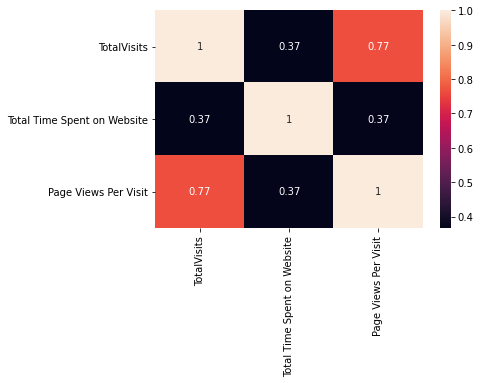

In [39]:
# Heat map to see correlation between continious variable
sns.heatmap(Lead[Lead_conti_col].corr(), annot=True)
plt.show()

>- From the above correlation Heat map we can observe that variable "Total visits" is highly correlated with "page Views Per Visit" with correlation coefficient of 0.77

In [40]:
# Dropping unnecessary columns.
Lead = Lead.drop(['Lead Number','What matters most to you in choosing a course','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Through Recommendations','Search','Digital Advertisement','Update me on Supply Chain Content','Receive More Updates About Our Courses',
           'Get updates on DM Content','A free copy of Mastering The Interview','I agree to pay the amount through cheque','Country'],1)

In [41]:
# shape of the dataframe after cleaning the dataset
Lead.shape

(9074, 15)

## DATA PREPARATION

In [42]:
# Converting some binary variables (Yes/No) to 0/1.
Binary_List = ["Do Not Email","Do Not Call"] # List of variables to map

# Defining map function.
def binary_m(x):
    return x.map({"Yes": 1, "No": 0})
Lead[Binary_List] = Lead[Binary_List].apply(binary_m)

In [43]:
# Creating dummy variables for categorical columns.
dummy = pd.get_dummies(Lead[["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation",
                             "Tags", "City", "Last Notable Activity"]], drop_first= True)


In [44]:
# Concatenating the dummy data frame to the master dataframe.
Lead = pd.concat([Lead, dummy], axis=1)

In [45]:
# Dropping the duplicate columns, since we have already created dummy columns.
Lead.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation","Tags", "City", 
           "Last Notable Activity"], axis = 1, inplace= True)

In [46]:
# Let's look into the data again
Lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_LNA,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## MODEL BUILDING

In [47]:
# Splitting the data into X and y
X = Lead.drop(["Prospect ID", "Converted"], 1)

# Defining the target variable
y = Lead["Converted"]

In [48]:
# X dataframe
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_LNA,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
# y data series
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Test Train Split

In [50]:
# Importing the required library for Train-Test Split.
from sklearn.model_selection import train_test_split

In [51]:
# Train test split of data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling

In [52]:
# Importing the required library to Scale the data
from sklearn.preprocessing import StandardScaler

In [53]:
# Scaling the data.
scaler = StandardScaler()
X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_LNA,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,0,-0.432779,-0.150296,-0.155018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,0,-0.432779,-0.543632,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.904666,-1.265540,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4750,0,0,-0.432779,1.717578,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0,0,0.643547,2.053909,0.122613,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# Checking Lead conversion rate.
conversion = sum(Lead["Converted"])/len(Lead)*100
conversion

37.85541106458012

In [55]:
# Importing the library for model building.
import statsmodels.api as sm 

In [56]:
# Building the first model.
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1768.5
Date:                Mon, 08 Feb 2021   Deviance:                       3537.0
Time:                        12:19:06   Pearson chi2:                 9.77e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5411      1.812     -1.402      0.161      -6.093       1.011
Do Not Email                                            -1.6633      0.252     -6.607      0.000      -2.157      -1.170
Do Not Call                                             19.2968   3.17e+04      0.001      1.000   -6.21e+04    6.22e+04
TotalVisits                                              0.2050      0.071      2.900      0.004       0.066       0.344
Total Time Spent on Website                              1.2089      0.052     23.098      0.000       1.106       1.311
Page Views Per Visit                                    -0.2996      0.078     -3.831      0.000      -0.453      -0.146
Lead Origin_Landing Page Submission                     -1.0356      0.171     -6.065      0.000      -1.370      -0.701
Lead Origin_Lead Add Form                                1.0675      1.167      0.914      0.361      -1.221       3.356
Lead Origin_Lead Import                                  1.6017      0.915      1.750      0.080      -0.193       3.396
Lead Source_Google                                       0.1088      0.122      0.894      0.371      -0.130       0.347
Lead Source_Olark Chat                                   0.9142      0.197      4.635      0.000       0.528       1.301
Lead Source_Organic Search                               0.1225      0.166      0.738      0.461      -0.203       0.448
Lead Source_Reference                                    1.8957      1.203      1.575      0.115      -0.463       4.254
Lead Source_Referral Sites                              -0.1115      0.413     -0.270      0.787      -0.921       0.698
Lead Source_Welingak Website                             4.0744      1.379      2.954      0.003       1.371       6.778
Lead Source_other_LS                                    -0.2163      0.679     -0.318      0.750      -1.548       1.115
Last Activity_Email Bounced                             -0.5065      0.709     -0.715      0.475      -1.895       0.882
Last Activity_Email Link Clicked                         0.8010      0.524      1.529      0.126      -0.225       1.827
Last Activity_Email Opened                               0.4093      0.293      1.395      0.163      -0.166       0.984
Last Activity_Olark Chat Conversation                   -0.4655      0.314     -1.481      0.139      -1.082       0.151
Last Activity_Page Visited on Website                    0.4791      0.345      1.389      0.165      -0.197       1.155
Last Activity_SMS Sent                                   1.1850      0.281      4.216      0.000       0.634       1.736
Last Activity_other_LA                                   0

### Feature selection using RFE

In [57]:
# Importing libraries required for RFE.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [58]:
# Running RFE with 15 variable outcome.
lgr = LogisticRegression()
rfe = RFE(lgr, 15)
rfe = rfe.fit(X_train, y_train)

In [59]:
# List of columns with RFE support and their ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 34),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_other_LS', False, 36),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 17),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 18),
 ('Last Activity_SMS Sent', False, 8),
 ('Last Activity_other_LA', False, 12),
 ('Specialization_Business Administration', False, 29),
 ('Specialization_Finance Managemen

In [60]:
# The 15 columns finalized by RFE.
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Specialization_other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_other_Tags',
       'Tags_switched off', 'Last Notable Activity_Other_LNA',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [61]:
# Dropping the columns which do not have RFE Support.
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_other_LS', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_other_LA', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Specialization_other_Specialization',
       'What is your 

In [62]:
# New dataframe with columns finalized by RFE
X_train_new = X_train[col_rfe]

In [63]:
# Building the second model using col_rfe.
logm2 = sm.GLM(y_train, sm.add_constant(X_train_new), family= sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2160.6
Date:                Mon, 08 Feb 2021   Deviance:                       4321.2
Time:                        12:19:10   Pearson chi2:                 9.02e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5777      0.388     -4.066      0.000      -2.338      -0.817
Do Not Email                                            -1.8629      0.183    -10.159      0.000      -2.222      -1.503
Lead Origin_Landing Page Submission                     -1.2753      0.137     -9.341      0.000      -1.543      -1.008
Lead Origin_Lead Add Form                                1.6443      0.305      5.387      0.000       1.046       2.243
Lead Source_Welingak Website                             2.5093      0.798      3.146      0.002       0.946       4.072
Last Activity_Olark Chat Conversation                   -1.4679      0.165     -8.896      0.000      -1.791      -1.144
Specialization_other                                    -1.6560      0.140    -11.828      0.000      -1.930      -1.382
What is your current occupation_Unemployed              -1.4880      0.296     -5.021      0.000      -2.069      -0.907
What is your current occupation_Working Professional     1.0378      0.366      2.834      0.005       0.320       1.755
Tags_Closed by Horizzon                                  8.5673      0.781     10.974      0.000       7.037      10.097
Tags_Ringing                                            -0.8138      0.392     -2.073      0.038      -1.583      -0.045
Tags_Will revert after reading the email                 3.9064      0.307     12.706      0.000       3.304       4.509
Tags_other_Tags                                          2.8624      0.320      8.941      0.000       2.235       3.490
Tags_switched off                                       -0.6916      0.605     -1.143      0.253      -1.878       0.495
Last Notable Activity_Other_LNA                          1.7307      0.327      5.298      0.000       1.090       2.371
Last Notable Activity_SMS Sent                           2.4296      0.103     23.511      0.000       2.227       2.632
========================================================================================================================
"""

#### Observation
>- p value of variable "Tags_switched off" is more than 0.05,therefore we need to drop this variable.

In [64]:
# Dropping the column 'Tags_switched off'.
X_train_new.drop("Tags_switched off", axis = 1, inplace = True)

In [65]:
# Building the third model.
logm3 = sm.GLM(y_train, sm.add_constant(X_train_new), family= sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.3
Date:                Mon, 08 Feb 2021   Deviance:                       4322.6
Time:                        12:19:10   Pearson chi2:                 8.76e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7415      0.379     -4.591      0.000      -2.485      -0.998
Do Not Email                                            -1.8636      0.183    -10.174      0.000      -2.223      -1.505
Lead Origin_Landing Page Submission                     -1.2824      0.137     -9.376      0.000      -1.550      -1.014
Lead Origin_Lead Add Form                                1.6478      0.306      5.390      0.000       1.049       2.247
Lead Source_Welingak Website                             2.5048      0.798      3.140      0.002       0.942       4.068
Last Activity_Olark Chat Conversation                   -1.4687      0.165     -8.896      0.000      -1.792      -1.145
Specialization_other                                    -1.6600      0.140    -11.831      0.000      -1.935      -1.385
What is your current occupation_Unemployed              -1.5336      0.299     -5.123      0.000      -2.120      -0.947
What is your current occupation_Working Professional     1.0116      0.372      2.722      0.006       0.283       1.740
Tags_Closed by Horizzon                                  8.7821      0.765     11.475      0.000       7.282      10.282
Tags_Ringing                                            -0.5859      0.354     -1.654      0.098      -1.280       0.108
Tags_Will revert after reading the email                 4.1228      0.265     15.556      0.000       3.603       4.642
Tags_other_Tags                                          3.0798      0.279     11.043      0.000       2.533       3.626
Last Notable Activity_Other_LNA                          1.7321      0.327      5.293      0.000       1.091       2.373
Last Notable Activity_SMS Sent                           2.4133      0.102     23.674      0.000       2.213       2.613
========================================================================================================================
"""

#### Observation
>- p value of variable "Tags_Ringing" is more than 0.05, therefore we need to drop this variable.

In [66]:
# Dropping the column 'Tags_Ringing'.
X_train_new.drop("Tags_Ringing", 1, inplace = True)

In [67]:
# Building the fourth model.
X_train_sm = sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.6
Date:                Mon, 08 Feb 2021   Deviance:                       4325.2
Time:                        12:19:10   Pearson chi2:                 9.35e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0134      0.363     -5.552      0.000      -2.724      -1.303
Do Not Email                                            -1.8610      0.183    -10.167      0.000      -2.220      -1.502
Lead Origin_Landing Page Submission                     -1.2928      0.137     -9.434      0.000      -1.561      -1.024
Lead Origin_Lead Add Form                                1.6169      0.301      5.373      0.000       1.027       2.207
Lead Source_Welingak Website                             2.5335      0.796      3.184      0.001       0.974       4.093
Last Activity_Olark Chat Conversation                   -1.4698      0.165     -8.894      0.000      -1.794      -1.146
Specialization_other                                    -1.6673      0.141    -11.863      0.000      -1.943      -1.392
What is your current occupation_Unemployed              -1.5971      0.306     -5.227      0.000      -2.196      -0.998
What is your current occupation_Working Professional     0.9708      0.380      2.556      0.011       0.226       1.715
Tags_Closed by Horizzon                                  9.1280      0.742     12.303      0.000       7.674      10.582
Tags_Will revert after reading the email                 4.4689      0.187     23.930      0.000       4.103       4.835
Tags_other_Tags                                          3.4269      0.205     16.700      0.000       3.025       3.829
Last Notable Activity_Other_LNA                          1.7316      0.328      5.283      0.000       1.089       2.374
Last Notable Activity_SMS Sent                           2.3939      0.101     23.716      0.000       2.196       2.592
========================================================================================================================
"""

#### Observation
p value of all the variables are less than 0.05.

In [68]:
# Importing the library required for VIF calculation.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Creating a dataframe of the variables with their respective VIF value.
vif = pd.DataFrame()
vif["variables"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,variables,VIF
0,const,51.05
8,What is your current occupation_Working Profes...,3.83
7,What is your current occupation_Unemployed,3.67
2,Lead Origin_Landing Page Submission,3.03
6,Specialization_other,2.91
3,Lead Origin_Lead Add Form,1.77
10,Tags_Will revert after reading the email,1.41
4,Lead Source_Welingak Website,1.38
11,Tags_other_Tags,1.28
9,Tags_Closed by Horizzon,1.23


#### Observation
>- VIF of all the variables are less than 5.

In [70]:
# Predicting y 
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

3009    0.393082
1012    0.198655
9226    0.005078
4750    0.876477
7987    0.185969
dtype: float64

In [71]:
# Reshaping y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)

In [72]:
# Creating a DataFrame with actual converted and predicted probability of conversion.
y_train_actual_pred = pd.DataFrame({"converted": y_train.values, "probability": y_train_pred})
y_train_actual_pred["pros_ID"] = y_train.index
y_train_actual_pred.head()

,converted,probability,pros_ID
0,0,0.393082,3009
1,0,0.198655,1012
2,0,0.005078,9226
3,1,0.876477,4750
4,1,0.185969,7987


In [73]:
# Adding column converted_pred with 1 if predicted probability of convertion is more than 0.5 otherwise 0.
y_train_actual_pred["converted_pred"] = y_train_actual_pred["probability"].map(lambda x: 1 if x > 0.5 else 0)
y_train_actual_pred['lead_score']=(y_train_actual_pred['probability']*100).astype("int64") # assigning lead score
y_train_actual_pred.sort_values(by='probability',ascending=False)
y_train_actual_pred.head()

,converted,probability,pros_ID,converted_pred,lead_score
0,0,0.393082,3009,0,39
1,0,0.198655,1012,0,19
2,0,0.005078,9226,0,0
3,1,0.876477,4750,1,87
4,1,0.185969,7987,0,18


In [74]:
# Importing a library required to evaluate the model.
from sklearn import metrics

In [75]:
# Confusion matrix.
confusion_m = metrics.confusion_matrix(y_train_actual_pred.converted, y_train_actual_pred.converted_pred)
print(confusion_m)

[[3695  210]
 [ 741 1705]]


In [76]:
# Accuracy of the final model.
metrics.accuracy_score(y_train_actual_pred.converted, y_train_actual_pred.converted_pred)

0.8502598016060463

In [77]:
# Confusion matrix elements.
TP = confusion_m[1,1]
TN = confusion_m[0,0]
FP = confusion_m[0,1]
FN = confusion_m[1,0]

In [78]:
# Calculating parameters to evaluate the logistic model.
Sensitivity = TP/float(TP + FN)
print("Sensitivity:", Sensitivity)
Specificity = TN/float(TN + FP)
print("Specificity:", Specificity)

Sensitivity: 0.697056418642682
Specificity: 0.9462227912932138


In [79]:
# Defining a function to plot the ROC curve.
def roc_curve(actual, prob):
    fpr, tpr, threshold = metrics.roc_curve(actual, prob, drop_intermediate= False)
    area_under_curve = metrics.roc_auc_score(actual, prob)
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, label = 'ROC CURVE (Area = %0.2f)' %area_under_curve)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate [1 - Specificity]')
    plt.ylabel('True Positive Rate [Sensitivity]')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

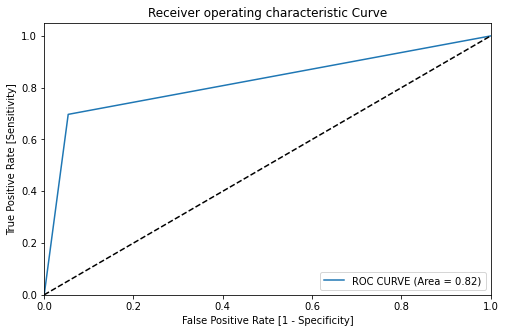

In [80]:
# Plotting the ROC curve.
roc_curve(y_train_actual_pred.converted, y_train_actual_pred.converted_pred)

>- The ROC Curve has an area of 0.82, which shows that our model is good.

In [81]:
# Finding the optimal cut off point.
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_actual_pred[i] = y_train_actual_pred.probability.map(lambda x: 1 if x > i else 0)
y_train_actual_pred.head()

,converted,probability,pros_ID,converted_pred,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.393082,3009,0,39,1,1,1,1,0,0,0,0,0,0
1,0,0.198655,1012,0,19,1,1,0,0,0,0,0,0,0,0
2,0,0.005078,9226,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0.876477,4750,1,87,1,1,1,1,1,1,1,1,1,0
4,1,0.185969,7987,0,18,1,1,0,0,0,0,0,0,0,0


In [82]:
# Creating a dataframe with accuracy, sensitivity and specificity for various probability cutoffs.
df = pd.DataFrame(columns=["probability", "accuracy", "sensitivity", "specificity"])
num = [float(x)/10 for x in range(10)]
for i in num:
    conf_m = metrics.confusion_matrix(y_train_actual_pred.converted, y_train_actual_pred[i])

    total = conf_m[0,0] + conf_m[0,1] +conf_m[1,0] +conf_m[1,1]
    accuracy = (conf_m[0,0] + conf_m[1,1])/ total
    
    sensitivity = conf_m[1,1]/(conf_m[1,1]+conf_m[1,0])
    specificity = conf_m[0,0]/(conf_m[0,0] +conf_m[0,1])
    
    df.loc[i] = [i, accuracy, sensitivity, specificity]

df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.729806,0.970564,0.579001
0.2,0.2,0.765549,0.922731,0.667093
0.3,0.3,0.767911,0.918234,0.673752
0.4,0.4,0.847898,0.705233,0.937260
0.5,0.5,0.850260,0.697056,0.946223
0.6,0.6,0.850890,0.692968,0.949808
0.7,0.7,0.850732,0.687653,0.952881
0.8,0.8,0.836876,0.612837,0.977209
0.9,0.9,0.741458,0.333197,0.997183


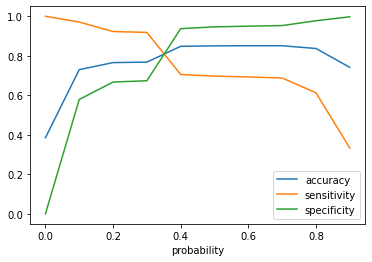

In [83]:
# Plotting accuracy, sensitivity and specificity for various probabilities. 

df.plot.line(x = "probability", y = ["accuracy","sensitivity","specificity"])

>- From the above plot, 0.385 seems to be the ideal cut-off point.

In [84]:
# Adding column final_predicted with 1 if predicted probability of convertion is more than 0.385 otherwise 0.
y_train_actual_pred["final_predicted"] = y_train_actual_pred.probability.map(lambda x: 1 if x > 0.385 else 0)
y_train_actual_pred['lead_score']=(y_train_actual_pred['probability']*100).astype("int64") # assigning lead score
y_train_actual_pred.head()

,converted,probability,pros_ID,converted_pred,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.393082,3009,0,39,1,1,1,1,0,0,0,0,0,0,1
1,0,0.198655,1012,0,19,1,1,0,0,0,0,0,0,0,0,0
2,0,0.005078,9226,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.876477,4750,1,87,1,1,1,1,1,1,1,1,1,0,1
4,1,0.185969,7987,0,18,1,1,0,0,0,0,0,0,0,0,0


In [85]:
# Confusion matrix to evaluate the model.
confusion_m = metrics.confusion_matrix(y_train_actual_pred.converted, y_train_actual_pred.final_predicted)
print(confusion_m)

[[3108  797]
 [ 390 2056]]


In [86]:
# Accuracy of the model.
metrics.accuracy_score(y_train_actual_pred.converted, y_train_actual_pred.final_predicted)

0.8131002991654858

In [87]:
# Confusionm matrix elements.
TP = confusion_m[1,1]
TN = confusion_m[0,0]
FP = confusion_m[0,1]
FN = confusion_m[1,0]

In [88]:
#Calculating parameters for evaluating the logistc model
Sensitivity = TP/float(TP + FN)
print("Sensitivity:", Sensitivity)
Specificity = TN/float(TN + FP)
print("Specificity:", Specificity)

Sensitivity: 0.8405560098119379
Specificity: 0.7959026888604354


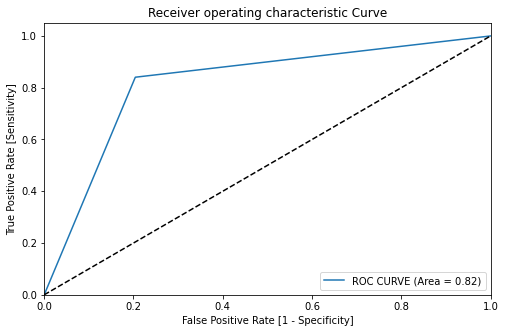

In [89]:
# Plotting the ROC curve for final model.
roc_curve(y_train_actual_pred.converted, y_train_actual_pred.final_predicted)

>- The ROC Curve has an area of 0.82, which shows that our model is good.

In [90]:
# Importing required libraries.
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [91]:
# Calculating Precision and Recall.
Precision = metrics.precision_score(y_train_actual_pred.converted, y_train_actual_pred.final_predicted)
print("Precision:" ,Precision)
Recall = metrics.recall_score(y_train_actual_pred.converted, y_train_actual_pred.final_predicted)
print("Recall:" , Recall)

Precision: 0.7206449351559762
Recall: 0.8405560098119379


-Our Logistic Regression Model is accurate and decent enough with high sensitivity as required. Since CEO in particular, has given a ballpark of the target lead conversion rate to be around 80%.(Accuracy - 0.81, Sensitivity - 0.84, Specificity - 0.79)

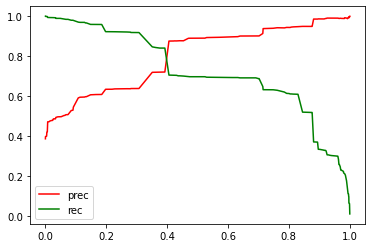

In [92]:
# Plotting the Precision-Recall Trade off Curve.
prec, rec, thresholds = precision_recall_curve(y_train_actual_pred.converted, y_train_actual_pred.probability)
plt.plot(thresholds, prec[:-1], "r", label = "prec" )
plt.plot(thresholds, rec[:-1], "g", label = "rec")
plt.legend()
plt.show()

>- We see that the optimal cutoff point is 0.385 from the Precision-Recall Trade off Curve.

### Model Prediction on Test data set

In [93]:
# Scaling the Test data set.
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [94]:
# Dropping 'Tags_switched' and 'Tags_Ringing' from the test dataset.
X_test = X_test[col_rfe]
X_test.drop(["Tags_switched off","Tags_Ringing"], 1, inplace = True)
X_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Specialization_other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Will revert after reading the email,Tags_other_Tags,Last Notable Activity_Other_LNA,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,1,1,0,0,1,0,0,0
1490,0,1,0,0,0,0,0,1,0,1,0,0,0
7936,0,0,0,0,0,1,1,0,0,1,0,0,0
4216,0,0,1,0,0,0,0,0,1,0,0,0,0
3830,0,1,0,0,0,0,1,0,0,1,0,0,0


In [95]:
X_test.shape

(2723, 13)

In [96]:
# Adding constant to the test dataset.
X_test_sm = sm.add_constant(X_test)

In [97]:
# predicting y_test
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)

In [98]:
# Creating a DataFrame with actual converted and predicted probability of conversion.
y_test_actual_pred = pd.DataFrame({"converted": y_test.values, "probability": y_test_pred})
y_test_actual_pred['Lead Score']=(y_test_actual_pred['probability']*100).astype("int64")
y_test_actual_pred["pros_ID"] = y_test.index
y_test_actual_pred.head()

,converted,probability,Lead Score,pros_ID
0,0,0.308138,30,3271
1,1,0.894117,89,1490
2,0,0.308138,30,7936
3,1,0.999839,99,4216
4,0,0.393082,39,3830


In [99]:
# Adding column predicted_conv with 1 if predicted probability of convertion is more than 0.385 otherwise 0
y_test_actual_pred["predicted_conv"] = y_test_actual_pred.probability.map(lambda x: 1 if x > 0.385 else 0)
y_test_actual_pred.head()

,converted,probability,Lead Score,pros_ID,predicted_conv
0,0,0.308138,30,3271,0
1,1,0.894117,89,1490,1
2,0,0.308138,30,7936,0
3,1,0.999839,99,4216,1
4,0,0.393082,39,3830,1


>- The 'Lead Score' column to can be used to identify potential leads to prioritize. Higher the score, higher the chances of conversion.

In [100]:
# Accuracy of the model.
metrics.accuracy_score(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)

0.8082996694821888

In [101]:
# Confusion matrix.
confusion_m = metrics.confusion_matrix(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)
print(confusion_m)

[[1395  339]
 [ 183  806]]


In [102]:
# Confusion matrix elements.
TP = confusion_m[1,1]
TN = confusion_m[0,0]
FP = confusion_m[0,1]
FN = confusion_m[1,0]

In [103]:
# Calculating parameters to evaluate the logistic model.
Sensitivity = TP/float(TP + FN)
print("Sensitivity:", Sensitivity)
Specificity = TN/float(TN + FP)
print("Specificity:", Specificity)

Sensitivity: 0.8149646107178968
Specificity: 0.8044982698961938


In [104]:
# Calculating parameters to evaluate the logistic model.
Precision = metrics.precision_score(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)
print("Precision:" ,Precision)
Recall = metrics.recall_score(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)
print("Recall:" , Recall)

Precision: 0.7039301310043669
Recall: 0.8149646107178968


#### Observations:
>- The sensitivity value for the Test data is 81.49% and 84.05% for the Train data.
>- The accuracy is 80.83% on the test data and  81.31 on the train data.
>- The above points show that model is performing well on the test data set and is not over-trained.

## Conclusion

### The Education company needs to focus on the following factors in order to improve the conversion rate of leads.
>- The leads who are tagged as 'Closed By Horizon' have a very high conversion rate.
>- The leads who are tagged as 'Will revert after reading email' have a good conversion rate and the number of customers tagged to this are very high and therefore these leads need to be focused more.
>- The leads with lead source 'Welingak website' have a  high conversion rate.
>- The leads with Last notable activity 'SMS sent' have a high conversion rate.
>- The total time spent on the Website has an impact on the conversion rate.
>- Leads who are working professionals have a high conversion rate.